# Проект №2 Разведывательный анализ данных (EDA)

## Цели и задачи: Провести анализ влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике для выявления студентов, находящихся в группе риска на ранней стадии

In [1810]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

In [1811]:
students = pd.read_csv('stud_math.csv')

### Функции 

In [1812]:
def cor_extreme_values(column):
    IQR = students[column].quantile(0.75) - students[column].quantile(0.25)
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    plt.figure()
    sns.countplot(x=column, palette='Greys',
                  data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])])
    plt.title(f'{column}')
    print(
        f' Для колонки {column} --- 25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, Границы выбросов: [{f}, {l}]')


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_hist(column):
    fig, ax = plt.subplots(figsize=(7, 4))
    students[column].hist()
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


significance = []


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            significance.append(column)
            break

## 1) Первичная обработка данных.

In [1813]:
students.rename({'Mjob': 'm_job', 'Fjob': 'f_job', 'Pstatus': 'p_status',
                 "Medu": 'm_edu', "Fedu": 'f_edu'}, inplace=True, axis=1)

In [1814]:
numeric_columns = ['age', 'absences', 'score']

#### Удалим из датасета строки с количеством незаполненных значений больше 20%

In [1815]:
border = len(students.columns)*0.2
students = students[(students.isna().sum(axis=1)) < 6]

## 2) Распределение признака числовых переменных, устранение выбросов, заполнение пропусков

 Для колонки age --- 25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0]
 Для колонки absences --- 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0, Границы выбросов: [-12.0, 20.0]
 Для колонки score --- 25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0, Границы выбросов: [-5.0, 115.0]


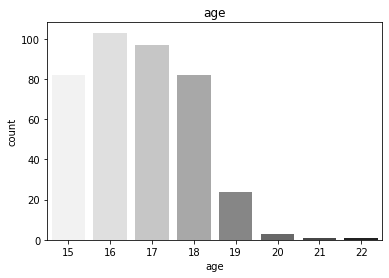

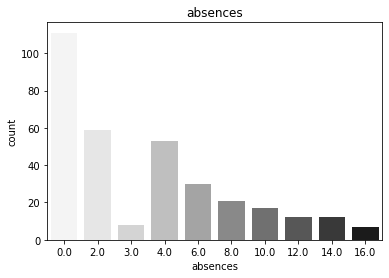

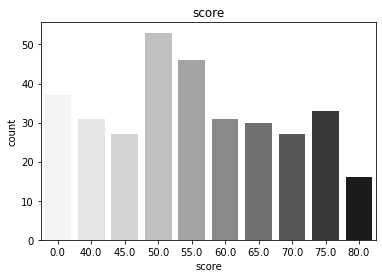

In [1816]:
for column in numeric_columns:
    cor_extreme_values(column)

##### В признаке 'age' и 'absences' присутствуют выбросы 


In [1817]:
perc_25 = students['age'].quantile(0.25)
perc_75 = students['age'].quantile(0.75)
IQR = students['age'].quantile(0.75) - students['age'].quantile(0.25)

students.loc[~students['age'].between(perc_25 - 1.5*IQR, perc_75 + 1.5*IQR)]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,...,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


#### Одно значение равное 22 годам по методу Тьюки является выбросом. Значение возраста равное 22 не противоречит логике. Принято решение оставить значение в выборке.


### для количества пропущенных занятий

In [1818]:
perc_25 = students['absences'].quantile(0.25)
perc_75 = students['absences'].quantile(0.75)
IQR = students['absences'].quantile(0.75) - students['absences'].quantile(0.25)

students.loc[~students['absences'].between(
    perc_25 - 1.5*IQR, perc_75 + 1.5*IQR)]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,...,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,...,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,...,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,...,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,...,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,...,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,...,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0


Согласно методу Дж.Тьюки мы получили достаточно много значений определяемых как выброс. В связи со смещением графика вправо(экспоненциальное распределение) принято решение определить выбросы используя внешнюю границу равную 3 межквартильным размахам. Данное решение позволит избежать удаления потенциально значимых наблюдений, так как пропуск занятий скорее всего сильно влияет на итоговую оценку по экзамену.

In [1819]:
perc_25 = students['absences'].quantile(0.25)
perc_75 = students['absences'].quantile(0.75)
IQR = students['absences'].quantile(0.75) - students['absences'].quantile(0.25)

out = students.loc[(~students['absences'].between(
    perc_25 - 3*IQR, perc_75 + 3*IQR)) & (students['absences'].isna() == False)]

In [1820]:
students = students.drop(out.index, axis=0)

### Заполним пропуски в количественных признаках

##### Количество пропущенных занятий

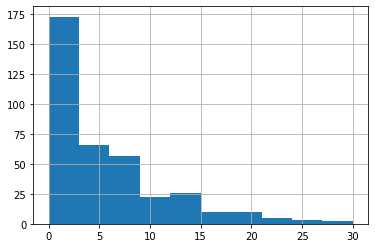

In [1821]:
students['absences'].hist();

In [1822]:
students['absences'].isna().value_counts()

False    374
True      12
Name: absences, dtype: int64

Так как распределение смещено вправо, для заполнения 12 пропущенных значений воспользуемся медианой

In [1823]:
students['absences'].fillna(students['absences'].median(), inplace=True)

##### Итоговая оценка

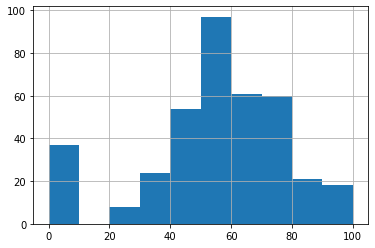

In [1824]:
students['score'].hist();

In [1825]:
students['score'].isna().value_counts()

False    380
True       6
Name: score, dtype: int64

Анализируя распределение итоговой оценки можно заметить, что большинство оценок распределено между 20 и 100 баллами. Отдельно выделяется группа людей набравших 0 баллов(возможно они не явились на экзамен). Так как признак является целевым заполнение средними значениями может ухудшить нашу модель. В связи с небольшим количеством пропусков (6), решено удалить наблюдения.

In [1826]:
students.dropna(subset=['score'], inplace=True)

## 3) Распределение признака номинативных переменных, устранение выбросов, заполнение пропусков

 #### Школа, в которой учится ученик

GP    336
MS     44
Name: school, dtype: int64

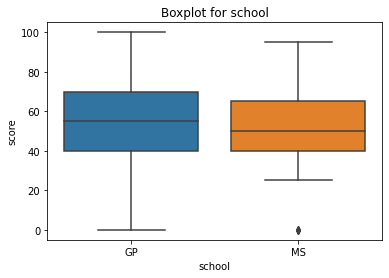

In [1827]:
sns.boxplot(x=students["school"], y='score', data=students)
plt.title("Boxplot for school")
students['school'].value_counts(dropna=False)

Имеется 2 категории признака (наименование школы). Пропусков нет.

 #### Пол ученика ('F' - женский, 'M' - мужской)

F    198
M    182
Name: sex, dtype: int64

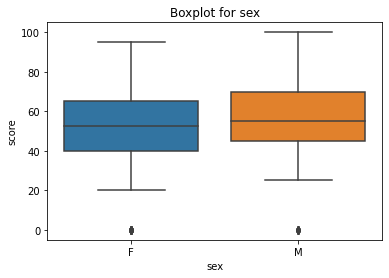

In [1828]:
sns.boxplot(x=students["sex"], y='score', data=students)
plt.title("Boxplot for sex")
students['sex'].value_counts(dropna=False)

Имеется 2 категории признака (пол). Пропусков нет.

#### Адрес ученика ('U' - городской, 'R' - за городом)

U      284
R       81
NaN     15
Name: address, dtype: int64

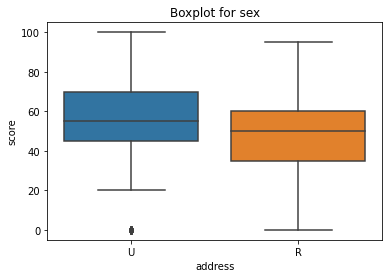

In [1829]:
sns.boxplot(x=students["address"], y='score', data=students)
plt.title("Boxplot for sex")
students['address'].value_counts(dropna=False)

Имеется 2 категории признака. 15 Пропусков. Посмотрим на распределение признака в зависимости от школы и времени в пути. 

In [1830]:
students.groupby(['school', 'traveltime'])['address'].describe()

count unique top freq
school traveltime                      
GP     1.0          214      2   U  186
       2.0           70      2   U   53
       3.0           14      2   U    9
       4.0            6      2   U    3
MS     1.0           12      2   U    7
       2.0           17      2   U    9
       3.0            7      1   R    7
       4.0            1      1   R    1

In [1831]:
students[(students['school'] == 'MS') & (
    students['traveltime'] > 2)]['address'].value_counts()

R    8
Name: address, dtype: int64

In [1832]:
students[(students['school'] == 'GP') & (
    students['traveltime'] > 2)]['address'].value_counts()

U    12
R     8
Name: address, dtype: int64

Проанализировав можно сделать выводы что большинство учеников имеют городской адрес (U), за исключением тех кто добирается до школы больше чем 2 часа, заполним пропуски на основании этого вывода.

In [1833]:
students['address'] = students.apply(lambda x: ('R' if x['traveltime'] > 2 else 'U')
                                     if pd.isna(x['address']) else x['address'], axis=1)

#### Размер семьи('LE3' <= 3, 'GT3' >3)

GT3    248
LE3    105
NaN     27
Name: famsize, dtype: int64

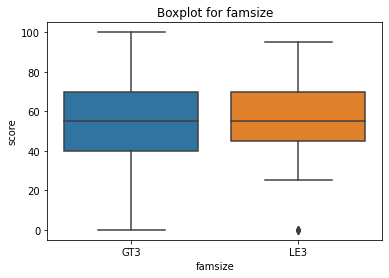

In [1834]:
sns.boxplot(x=students["famsize"], y='score', data=students)
plt.title("Boxplot for famsize")
students['famsize'].value_counts(dropna=False)

Имеется 2 категории признака (состав семье более 3 и менее). Имеется 27 пропусков

In [1835]:
students.groupby('p_status')['famsize'].value_counts(normalize=True)

p_status  famsize
A         GT3        0.612903
          LE3        0.387097
T         GT3        0.715789
          LE3        0.284211
Name: famsize, dtype: float64

Большинство семей имеет состав более 3 человек, доплнительным фактором является признак живут ли родители вместе. Заменим пропуски в зависимости от факта совместного проживания родителей.

In [1836]:
students['famsize'].value_counts()

GT3    248
LE3    105
Name: famsize, dtype: int64

In [1837]:
students['famsize'] = students.apply(lambda x: ('GT3' if x['p_status'] == 'T' else 'LE3')
                                     if pd.isna(x['famsize']) else x['famsize'], axis=1)

#### Cтатус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

T      305
NaN     41
A       34
Name: p_status, dtype: int64

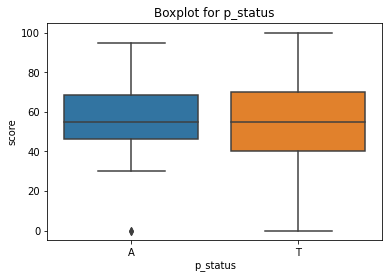

In [1838]:
sns.boxplot(x=students["p_status"], y='score', data=students)
plt.title("Boxplot for p_status")
students['p_status'].value_counts(dropna=False)

Имеется 2 категории признака (живут вместе или раздельно). Имеется 41 пропусков.

In [1839]:
students.groupby('famsize')["p_status"].value_counts(normalize=True)

famsize  p_status
GT3      T           0.921811
         A           0.078189
LE3      T           0.843750
         A           0.156250
Name: p_status, dtype: float64

Заменим пропуски на основании количества состава семьи >3: родители живут вместе, <3: раздельно

In [1840]:
students['p_status'] = students.apply(lambda x: ('T' if x['famsize'] == 'GT3' else 'A')
                                      if pd.isna(x['p_status']) else x['p_status'], axis=1)

#### Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)




4.0    130
2.0     96
3.0     92
1.0     56
NaN      3
0.0      3
Name: m_edu, dtype: int64

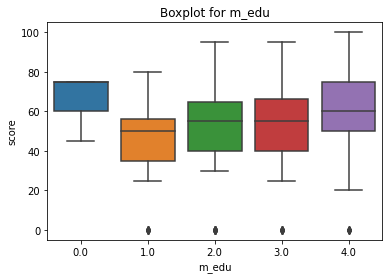

In [1841]:
sns.boxplot(x=students["m_edu"], y='score', data=students)
plt.title("Boxplot for m_edu")
students['m_edu'].value_counts(dropna=False)

Имеется 5 категорий признака. Имеется 3 пропускa.

In [1842]:
students['m_edu'].describe()

count    377.000000
mean       2.769231
std        1.102371
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

Заменим пропуски на среднее значение равное 3

In [1843]:
students['m_edu'].fillna(3, inplace=True)

#### Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)





2.0     102
3.0      90
4.0      87
1.0      74
NaN      24
0.0       2
40.0      1
Name: f_edu, dtype: int64

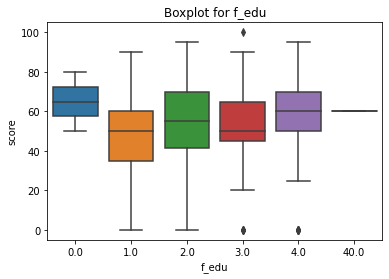

In [1844]:
sns.boxplot(x=students["f_edu"], y='score', data=students)
plt.title("Boxplot for f_edu")
students['f_edu'].value_counts(dropna=False)

Имеется 5 категорий признака. Имеется 1 выброс равный 40. Имеется 24 пропуска. Будем считать что выброс является опечаткой и заменим его на значение 4. 

In [1845]:
students.loc[students['f_edu'] == 40, ["f_edu"]] = 4
students['f_edu'].describe()

count    356.000000
mean       2.528090
std        1.093797
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

In [1846]:
students.groupby('f_job')['f_edu'].value_counts()

f_job     f_edu
at_home   2.0       6
          1.0       3
          3.0       3
          4.0       2
health    4.0       8
          3.0       3
          1.0       1
          2.0       1
other     2.0      57
          3.0      48
          1.0      46
          4.0      31
          0.0       2
services  3.0      29
          2.0      24
          1.0      18
          4.0      16
teacher   4.0      25
Name: f_edu, dtype: int64

Пропуски заменим средними значениями равными 2, за исключением людей которые работают учителем и сфере здравоохранения, для них уровень образования 4

In [1847]:
students['f_edu'] = students.apply(lambda x: (4 if x['f_job'] in ['teacher', 'health'] else 2)
                                   if pd.isna(x['f_edu']) else x['f_edu'], axis=1)

#### Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       123
services     95
at_home      57
teacher      54
health       32
NaN          19
Name: m_job, dtype: int64

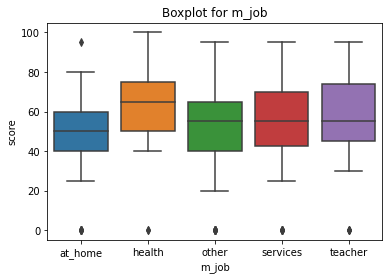

In [1848]:
sns.boxplot(x=students["m_job"], y='score', data=students)
plt.title("Boxplot for m_job")
students['m_job'].value_counts(dropna=False)

Выбросы отсутствуют. 19 пропусков. Заменим пропуски на наиболее часто встречающююся категорию 'other'

In [1739]:
students['m_job'].fillna('other', inplace=True)

#### Работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       191
services     95
NaN          35
teacher      28
at_home      16
health       15
Name: f_job, dtype: int64

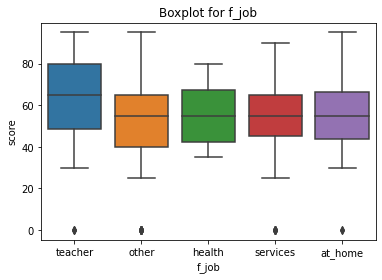

In [1740]:
sns.boxplot(x=students["f_job"], y='score', data=students)
plt.title("Boxplot for f_job")
students['f_job'].value_counts(dropna=False)

Выбросы отсутствуют. 35 пропусков. Заменим пропуски на наиболее часто встречающююся категорию 'other'

In [1741]:
students['f_job'].fillna('other', inplace=True)

#### Причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

course        134
home           99
reputation     99
other          32
NaN            16
Name: reason, dtype: int64

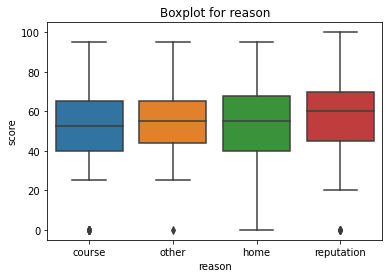

In [1742]:
sns.boxplot(x=students["reason"], y='score', data=students)
plt.title("Boxplot for reason")
students['reason'].value_counts(dropna=False)

Признак категориальный. Выбросов нет, имеется 16 пропусков. Истиную причину выбора школы установить сложно, заменим пропуски на 'other', кроме школьников у которых категориальный признак 'travel_time'(время в пути)  равняется 1, для них причина выбора школы будет являться ее близость к дому

In [1743]:
students['reason'] = students.apply(lambda x: ('home' if x['traveltime'] == 1 else 'other')
                                    if pd.isna(x['reason']) else x['reason'], axis=1)

In [1744]:
students['reason'].value_counts(dropna=False)

course        134
home          112
reputation     99
other          35
Name: reason, dtype: int64

#### Опекун ('mother' - мать, 'father' - отец, 'other' - другое)

mother    242
father     86
NaN        30
other      22
Name: guardian, dtype: int64

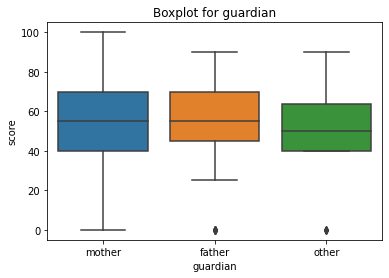

In [1745]:
sns.boxplot(x=students["guardian"], y='score', data=students)
plt.title("Boxplot for guardian")
students['guardian'].value_counts(dropna=False)

Заменим пропуски на значение 'mother' так как мать чаще всего является опекуном

In [1746]:
students['guardian'].fillna('mother', inplace=True)

#### Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1.0    233
2.0     92
NaN     27
3.0     21
4.0      7
Name: traveltime, dtype: int64

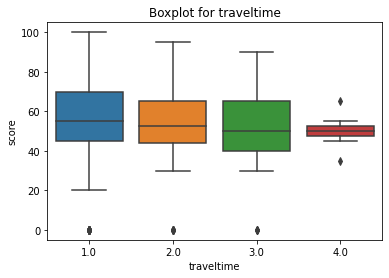

In [1747]:
sns.boxplot(x=students["traveltime"], y='score', data=students)
plt.title("Boxplot for traveltime")
students['traveltime'].value_counts(dropna=False)

Признак категориальный, выбросов нет. Имеется 27 пропусков, заменим пропуски на 1 если школьник живет в городе и на 2 если за городом

In [1748]:
students['traveltime'] = students.apply(lambda x: (1 if x['address'] == 'U' else 2)
                                        if pd.isna(x['traveltime']) else x['traveltime'], axis=1)

#### Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

2.0    184
1.0    102
3.0     62
4.0     27
NaN      5
Name: studytime, dtype: int64

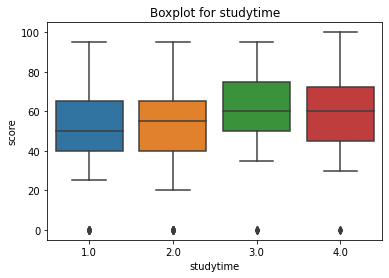

In [1749]:
sns.boxplot(x=students["studytime"], y='score', data=students)
plt.title("Boxplot for studytime")
students['studytime'].value_counts(dropna=False)

Признак категориальный, выбросы отсутствуют. Имеется 5 пропусков. Заменим пропуски на 2(наиболее часто встречающееся)

In [1750]:
students['studytime'].fillna(2, inplace=True)

#### Количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

0.0    285
1.0     45
NaN     22
3.0     14
2.0     14
Name: failures, dtype: int64

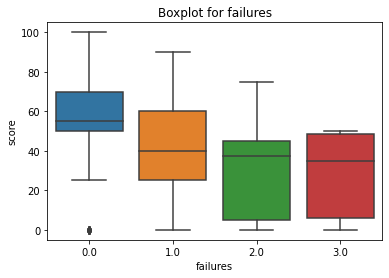

In [1751]:
sns.boxplot(x=students["failures"], y='score', data=students)
plt.title("Boxplot for failures")
students['failures'].value_counts(dropna=False)

Признак категориальный, выбросов нет. 22 пропуска заменим на 0(наиболее часто встречающееся)

In [1752]:
students['failures'].fillna(0, inplace=True)

#### Дополнительная образовательная поддержка (yes или no)

no     325
yes     46
NaN      9
Name: schoolsup, dtype: int64

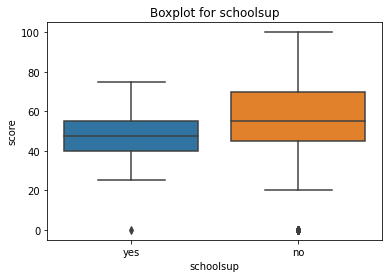

In [1753]:
sns.boxplot(x=students["schoolsup"], y='score', data=students)
plt.title("Boxplot for schoolsup")
students['schoolsup'].value_counts(dropna=False)

Выбросов нет, 9 пропусков заменим на 'no'(наиболее часто встречающееся)

In [1754]:
students['schoolsup'].fillna('no', inplace=True)

#### Cемейная образовательная поддержка (yes или no)

yes    212
no     132
NaN     36
Name: famsup, dtype: int64

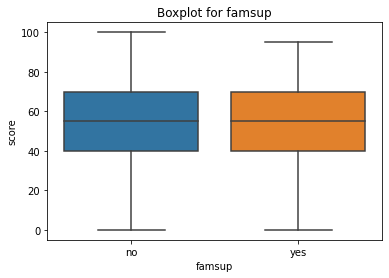

In [1755]:
sns.boxplot(x=students["famsup"], y='score', data=students)
plt.title("Boxplot for famsup")
students['famsup'].value_counts(dropna=False)

Выбросы отсутствуют, имеется 36 пропусков. Посмотрим наличие поддержки дома в зависимости от образования родителей

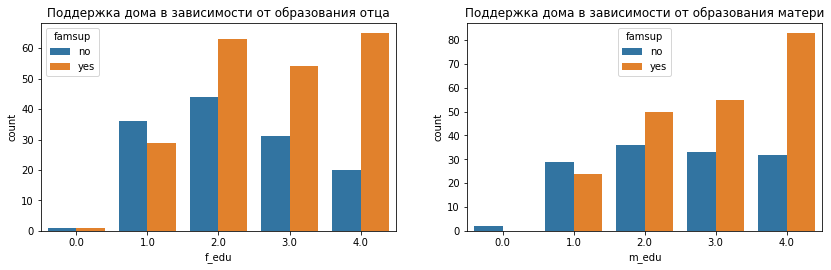

In [1756]:
plt.figure(figsize=(14, 13))
plt.subplot(321)
sns.countplot(x='f_edu', data=students, hue='famsup')
plt.title('Поддержка дома в зависимости от образования отца')
plt.subplot(322)
sns.countplot(x='m_edu', data=students, hue='famsup')
plt.title('Поддержка дома в зависимости от образования матери');

Можно сделать вывод что помощь чаще оказывается чем не оказывается, начиная с уровня образования родителей(отца или матери) равного 2. Заменим пропуски исходя из этого наблюдения

In [1757]:
students['famsup'] = students.apply(lambda x: ('yes' if (x['f_edu'] >= 2) or (x['m_edu'] >= 2) else 'no')
                                    if pd.isna(x['famsup']) else x['famsup'], axis=1)

#### Дополнительные платные занятия по математике (yes или no)

no     192
yes    149
NaN     39
Name: paid, dtype: int64

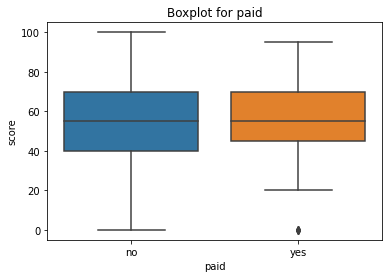

In [1758]:
sns.boxplot(x=students["paid"], y='score', data=students)
plt.title("Boxplot for paid")
students['paid'].value_counts(dropna=False)

Выбросы отсутствуют, имеется 39 пропусков. Достаточно трудно определить принадлженость к одному из классов. Посмотрим сколько времени тратит школьник на учебу, хочет ли получить высшее образование и посещает ли при этом курсы

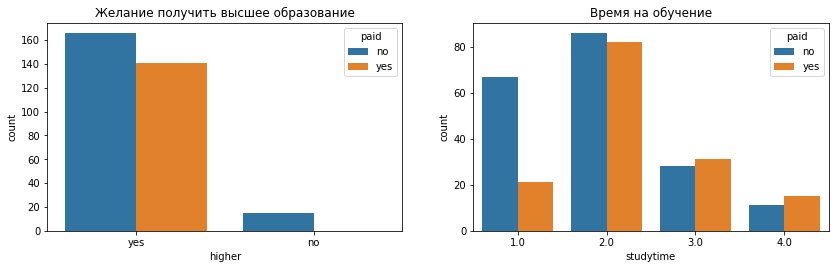

In [1759]:
plt.figure(figsize=(14, 13))
plt.subplot(321)
sns.countplot(x='higher', data=students, hue='paid')
plt.title('Желание получить высшее образование')
plt.subplot(322)
sns.countplot(x='studytime', data=students, hue='paid')
plt.title('Время на обучение');

Можно сделать вывод, что если школьник мало тратит время на учебу и не хочет получать высшее образование, то скорее всего он не ходит на курсы. Заполним пропуски исходя из этого наблюдения

In [1760]:
students['paid'] = students.apply(lambda x: ('no' if (x['studytime'] == 1) or (x['higher'] == 'no') else 'yes')
                                  if pd.isna(x['paid']) else x['paid'], axis=1)

#### Дополнительные внеучебные занятия (yes или no)

yes    188
no     178
NaN     14
Name: activities, dtype: int64

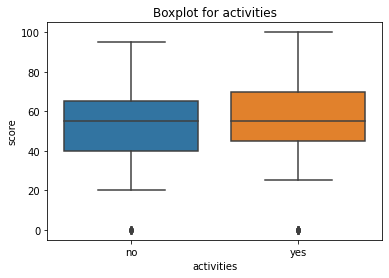

In [1761]:
sns.boxplot(x=students["activities"], y='score', data=students)
plt.title("Boxplot for activities")
students['activities'].value_counts(dropna=False)

Выбосов нет, 14 пропусков. Распределение примерно одинаковое, заполним пропуски случайным образом

In [1762]:
students['activities'].fillna(random.choice(['yes', 'no']), inplace=True)

#### Посещал детский сад (yes или no)

yes    289
no      76
NaN     15
Name: nursery, dtype: int64

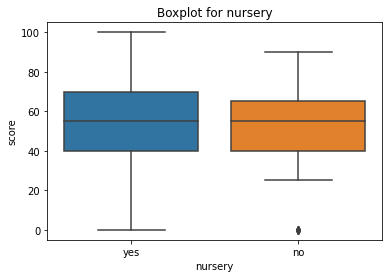

In [1763]:
sns.boxplot(x=students["nursery"], y='score', data=students)
plt.title("Boxplot for nursery")
students['nursery'].value_counts(dropna=False)

Выбросы отсутствуют, 15 пропусков. Явной корреляции с другими признаками не наблюдается, заменим пропуски на наиболее часто встречающееся 'yes'

In [1764]:
students['nursery'].fillna('yes', inplace=True)

#### Признак 'studytime, granular' которого нет в описании

-6.0     184
-3.0     102
-9.0      62
-12.0     27
 NaN       5
Name: studytime, granular, dtype: int64

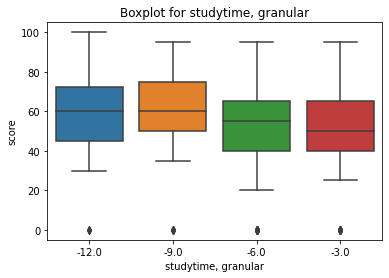

In [1765]:
sns.boxplot(x=students['studytime, granular'], y='score', data=students)
plt.title("Boxplot for studytime, granular")
students['studytime, granular'].value_counts(dropna=False)

In [1766]:
students['studytime'].value_counts(dropna=False)

2.0    189
1.0    102
3.0     62
4.0     27
Name: studytime, dtype: int64

<AxesSubplot:>

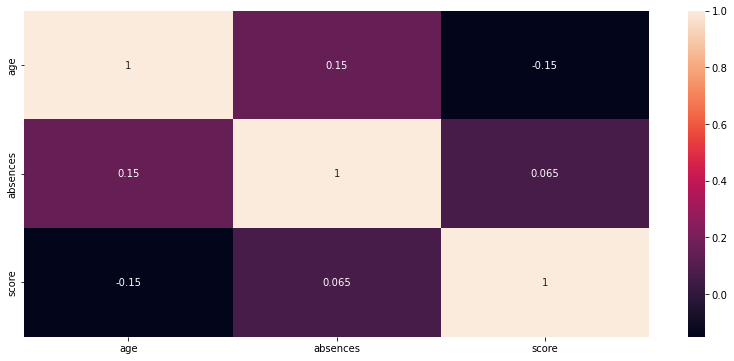

In [1767]:
plt.figure(figsize=(14, 6))
sns.heatmap(students.corr(), annot=True);

Выявлена 100% корреляция между признаками 'studytime, granular' и 'studytime'. От одного из признаков можно избавиться

students.drop('studytime, granular',axis=1,inplace=True)

#### Хочет получить высшее образование (yes или no)

yes    342
NaN     20
no      18
Name: higher, dtype: int64

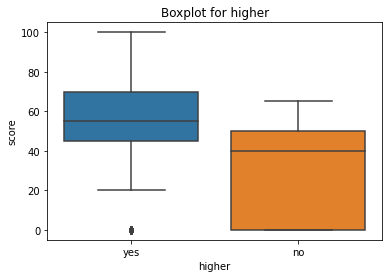

In [1768]:
sns.boxplot(x=students['higher'], y='score', data=students)
plt.title("Boxplot for higher")
students['higher'].value_counts(dropna=False)

Выбросы отсутствуют, 20 пропусков. Подавляющее большинство хочет получить высшее образование, заполним пропуски на этом основании 

In [1769]:
students['higher'].fillna('yes', inplace=True)

####  Наличие интернета дома (yes или no)

yes    292
no      54
NaN     34
Name: internet, dtype: int64

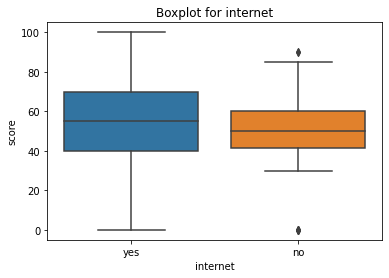

In [1770]:
sns.boxplot(x=students['internet'], y='score', data=students)
plt.title("Boxplot for internet")
students['internet'].value_counts(dropna=False)

Выбросов нет, 34 пропуска. У большинства интернет дома имеется. Заполним пропуски 'yes', так как отсутствие интернета не типично для современного мира

In [1771]:
students['internet'].fillna('yes', inplace=True)

####  В романтических отношениях (yes или no)

no     232
yes    119
NaN     29
Name: romantic, dtype: int64

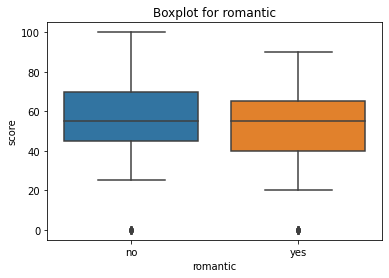

In [1772]:
sns.boxplot(x=students['romantic'], y='score', data=students)
plt.title("Boxplot for romantic")
students['romantic'].value_counts(dropna=False)

Выбросов нет, 29 пропусков. Большинство без отношений, заполним пропуски 'no'

In [1773]:
students['romantic'].fillna('no', inplace=True)

####  Cемейные отношения (от 1 - очень плохо до 5 - очень хорошо)

 4.0    175
 5.0     94
 3.0     61
 NaN     26
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

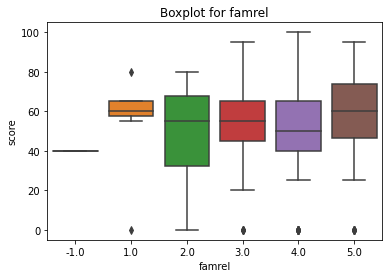

In [1774]:
sns.boxplot(x=students['famrel'], y='score', data=students)
plt.title("Boxplot for famrel")
students['famrel'].value_counts(dropna=False)

Имеется выброс равный -1 , пропущено 26 значений. Выброс будем считать опечаткой и заменим на 1. Пропущенные значения заменим на среднее равное 4

In [1775]:
students.loc[students['famrel'] == -1, ["famrel"]] = 1
students['famrel'].fillna(4, inplace=True)

####  Cвободное время после школы (от 1 - очень мало до 5 - очень мого)

3.0    149
4.0    109
2.0     63
5.0     36
1.0     15
NaN      8
Name: freetime, dtype: int64

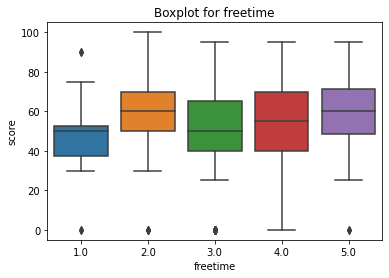

In [1776]:
sns.boxplot(x=students['freetime'], y='score', data=students)
plt.title("Boxplot for freetime")
students['freetime'].value_counts(dropna=False)

Выбросы отсутствуют, 8 пропусков. Заменим пропуски на среднее равное 3

In [1777]:
students['freetime'].describe()

count    372.000000
mean       3.236559
std        0.978451
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [1778]:
students['freetime'].fillna(3, inplace=True)

####  Проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

3.0    124
2.0     99
4.0     78
5.0     51
1.0     21
NaN      7
Name: goout, dtype: int64

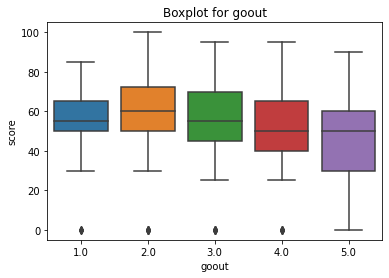

In [1779]:
sns.boxplot(x=students['goout'], y='score', data=students)
plt.title("Boxplot for goout")
students['goout'].value_counts(dropna=False)

Выбросы отсутствуют, 7 пропусков. Заменим пропуски на среднее равное 3

In [1780]:
students['goout'].describe()

count    373.000000
mean       3.104558
std        1.113121
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [1781]:
students['goout'].fillna(3, inplace=True)

####  Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

5.0    134
3.0     86
4.0     58
1.0     46
2.0     42
NaN     14
Name: health, dtype: int64

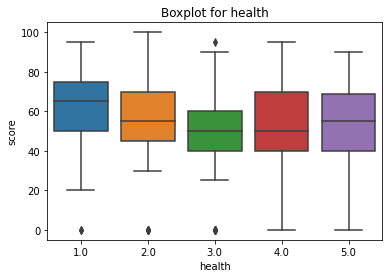

In [1782]:
sns.boxplot(x=students['health'], y='score', data=students)
plt.title("Boxplot for health")
students['health'].value_counts(dropna=False)

Выбросов нет, 14 пропусков. Заменим пропуски на среднее значение равное 4

In [1783]:
students['health'].describe()

count    366.00000
mean       3.52459
std        1.40379
min        1.00000
25%        3.00000
50%        4.00000
75%        5.00000
max        5.00000
Name: health, dtype: float64

In [1784]:
students['health'].fillna(4, inplace=True)

### Посмотрим на информацию обо всем датасете

In [1785]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               380 non-null    object 
 1   sex                  380 non-null    object 
 2   age                  380 non-null    int64  
 3   address              380 non-null    object 
 4   famsize              380 non-null    object 
 5   p_status             380 non-null    object 
 6   m_edu                380 non-null    float64
 7   f_edu                380 non-null    float64
 8   m_job                380 non-null    object 
 9   f_job                380 non-null    object 
 10  reason               380 non-null    object 
 11  guardian             380 non-null    object 
 12  traveltime           380 non-null    float64
 13  studytime            380 non-null    float64
 14  failures             380 non-null    float64
 15  schoolsup            380 non-null    obj

Пропуски и выбросы устранены, можно приступать к отбору параметров

## 4) Корреляционный анализ и отбор параметров

#### Произведем корреляционный анализ для количественных переменных

In [1786]:
z = students[numeric_columns].corr()

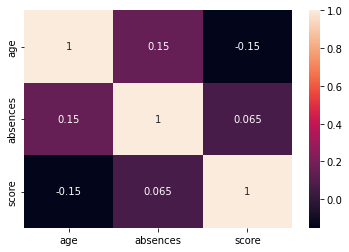

In [1787]:
sns.heatmap(z, annot=True)

Корреляция отсутствует. Все количественные парметры можно оставить

#### Произведем  анализ для номинативных переменных

In [1803]:
for column in numeric_columns:
    significance.append(column)

In [1788]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'p_status', 'm_edu',
                       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime',
                       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic',
                       'famrel', 'freetime', 'goout', 'health']

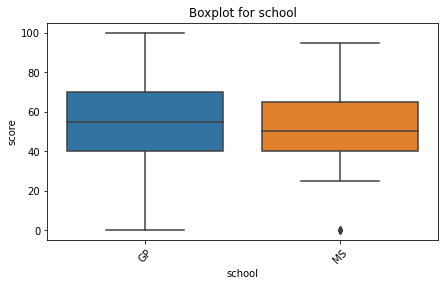

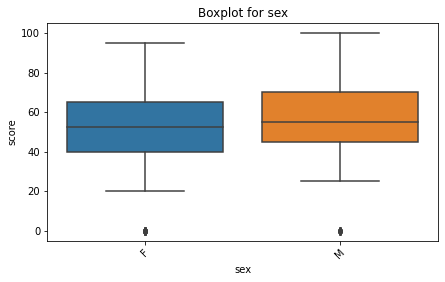

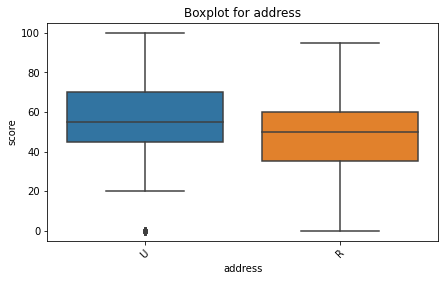

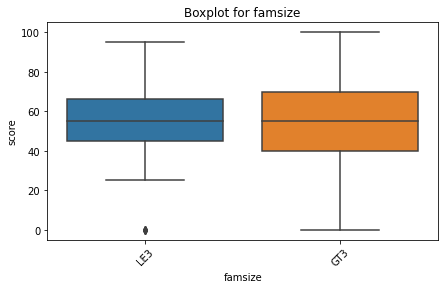

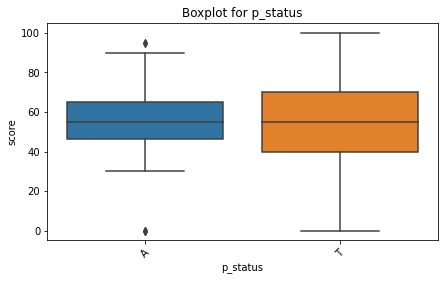

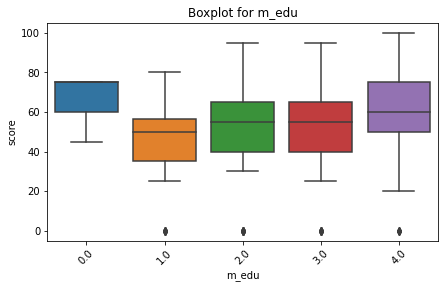

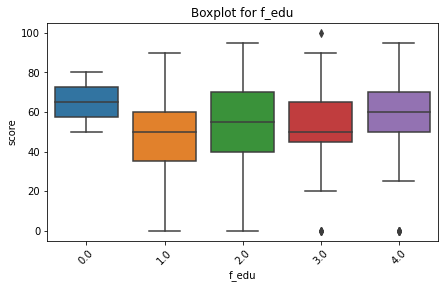

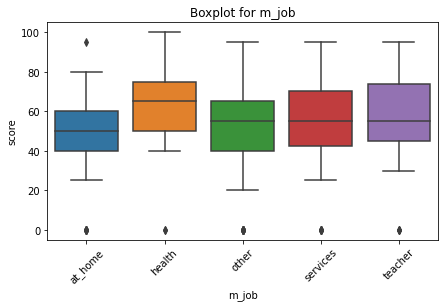

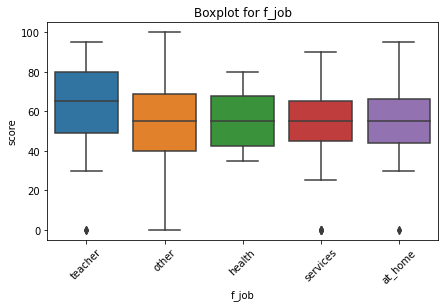

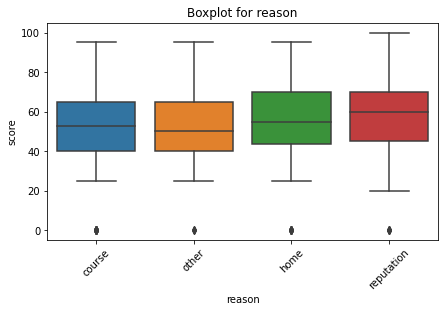

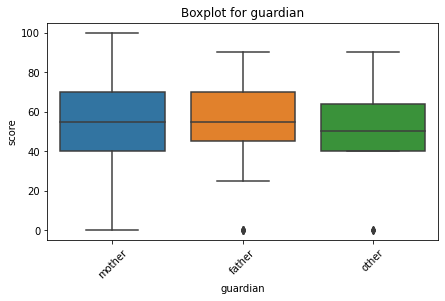

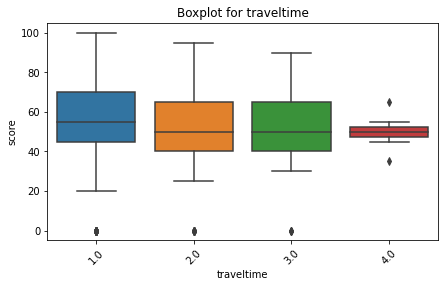

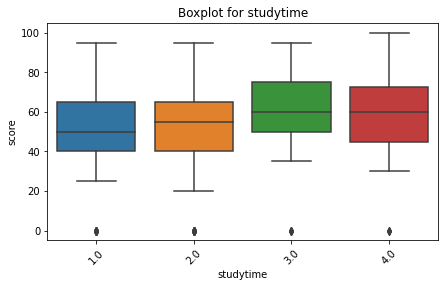

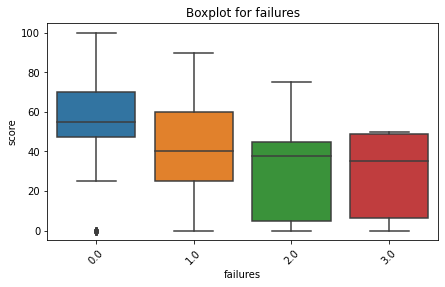

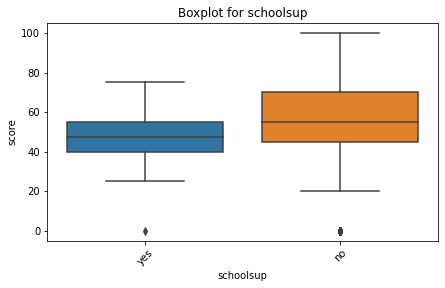

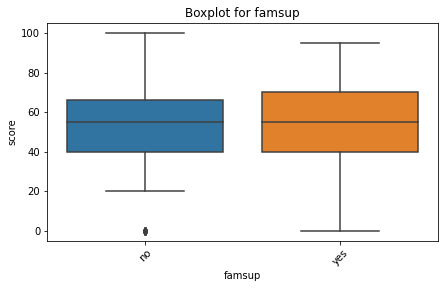

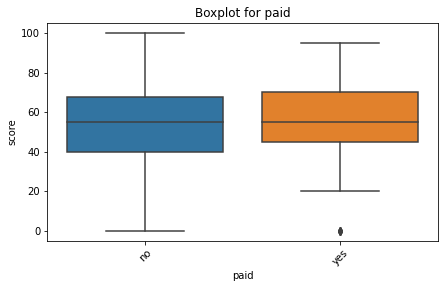

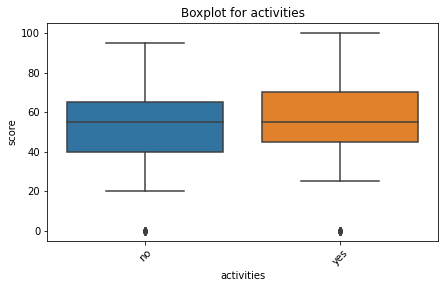

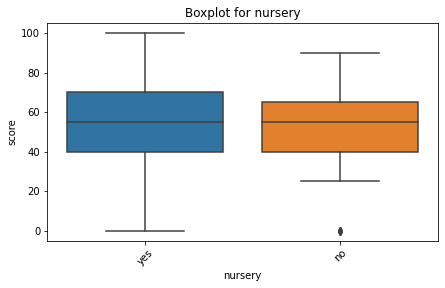

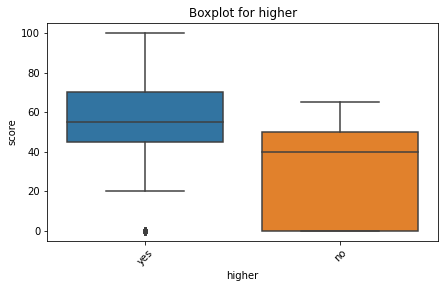

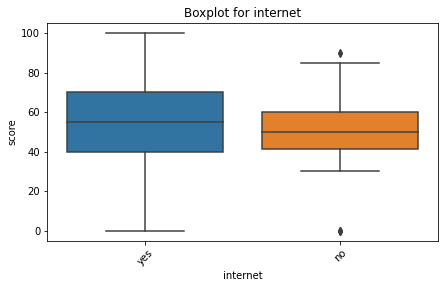

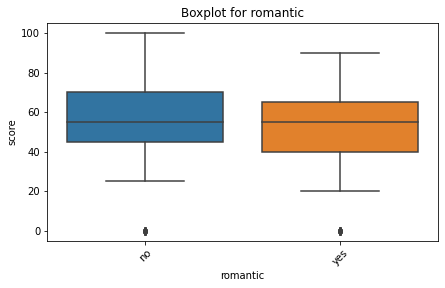

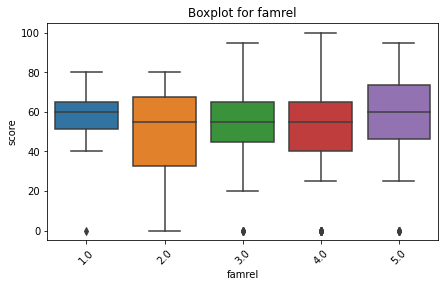

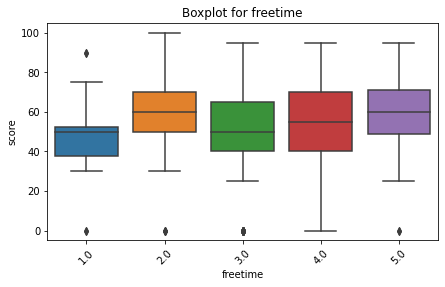

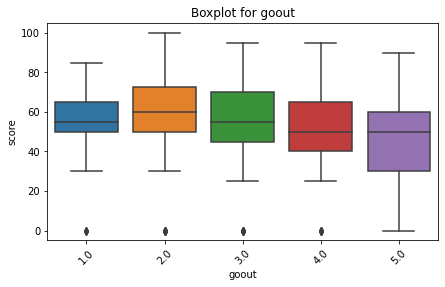

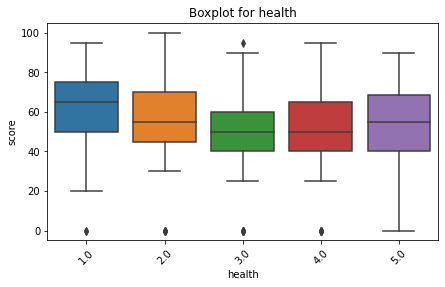

In [1789]:
for column in categorical_columns:
    get_boxplot(column)

In [1790]:
for column in categorical_columns:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Создадим новый датасет с отобранными признаками 

In [1805]:
students_model = students[significance]

##  5) Выводы

В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

-В данных достаточно мало пустых значений.

-Выбросы найдены только в столбцах 'f_edu' и 'famrel' с образованием отца, семейных отношениях и в столбце с пропущенными занятиями 'absences'.

-В изначальном датасете наблюдалась 100% корреляция между колонками studytime и studytime, granular. Возомжно целью было усилить значение времени затраченного на учебу на итоговую оценку.

-Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, m_edu, f_edu, m_job, failures, schoolsup, paid, higher, romantic, age, absences.

-Дальнейшие выводы по данным можно будет сделать только после внедрения модели.